<a href="https://colab.research.google.com/github/RajeshkumarA/Springboard_assignments/blob/main/Story_Dataset_Rajesh%20Ananthula.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploring the American Housing Market: A Data Story

This notebook summarizes the analysis of the "American_Housing_Data_20231209.csv" dataset, focusing on addressing key questions about the data, investigating trends, and presenting findings through visualizations and interpretations.

## Data Loading and Initial Exploration

We begin by loading the dataset and examining its structure and content to get an initial understanding of the available information, including the types of data and any missing values.

In [45]:
import pandas as pd

df = pd.read_csv('/content/Dataset/American_Housing_Data_20231209.csv')

display(df.head())
df.info()

,Zip Code,Price,Beds,Baths,Living Space,Address,City,State,Zip Code Population,Zip Code Density,County,Median Household Income,Latitude,Longitude
0,10013,3999000.0,2,3,1967,74 GRAND ST APT 3,New York,New York,29563,20967.9,New York,370046.0,40.72001,-74.00472
1,10013,3999000.0,2,3,1967,74 GRAND ST APT 3,New York,New York,29563,20967.9,New York,370046.0,40.72001,-74.00472
2,10014,1650000.0,1,1,718,140 CHARLES ST APT 4D,New York,New York,29815,23740.9,New York,249880.0,40.73407,-74.00601
3,10014,760000.0,3,2,1538,38 JONES ST,New York,New York,29815,23740.9,New York,249880.0,40.73407,-74.00601
4,10014,1100000.0,1,1,600,81 BEDFORD ST APT 3F,New York,New York,29815,23740.9,New York,249880.0,40.73407,-74.00601


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39981 entries, 0 to 39980
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Zip Code                 39981 non-null  int64  
 1   Price                    39981 non-null  float64
 2   Beds                     39981 non-null  int64  
 3   Baths                    39981 non-null  int64  
 4   Living Space             39981 non-null  int64  
 5   Address                  39981 non-null  object 
 6   City                     39981 non-null  object 
 7   State                    39981 non-null  object 
 8   Zip Code Population      39981 non-null  int64  
 9   Zip Code Density         39981 non-null  float64
 10  County                   39981 non-null  object 
 11  Median Household Income  39979 non-null  float64
 12  Latitude                 39981 non-null  float64
 13  Longitude                39981 non-null  float64
dtypes: float64(5), int64(5

## Addressing Key Questions through Analysis and Visualization

We will now address the questions posed about the data by performing relevant analysis and creating visualizations.

### Can I count something interesting?

Yes, we can count the number of properties in each state to understand the geographical distribution of the data.

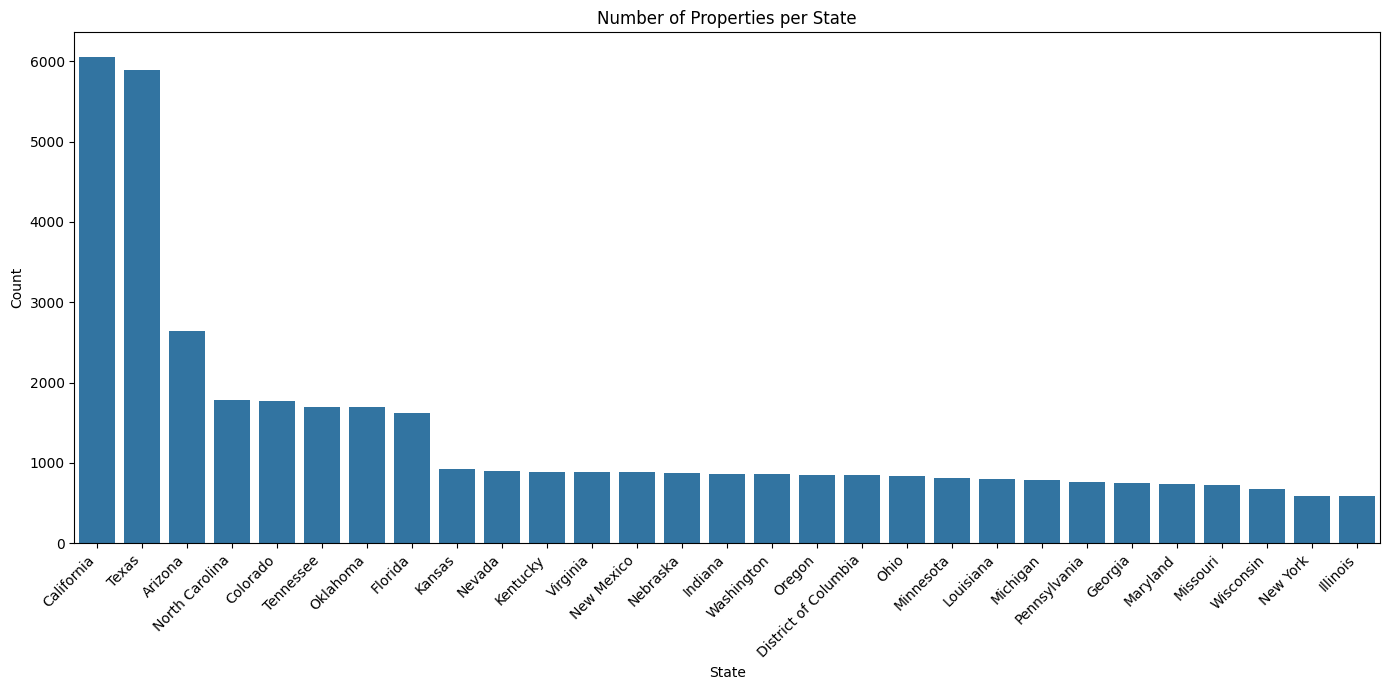

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14, 7))
state_counts = df['State'].value_counts().reset_index()
state_counts.columns = ['State', 'Count']
sns.barplot(data=state_counts, x='State', y='Count')
plt.title('Number of Properties per State')
plt.xlabel('State')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

**Interpretation:** This bar plot shows the number of properties listed in each state within the dataset. We can see which states are most represented, giving us an idea of the geographical coverage of the data.

### Can I find trends (e.g., high, low, increasing, decreasing, anomalies)? Can I make a bar plot or a histogram?

Yes, we can find trends by examining the distribution of key numerical features like Price and Living Space using histograms.

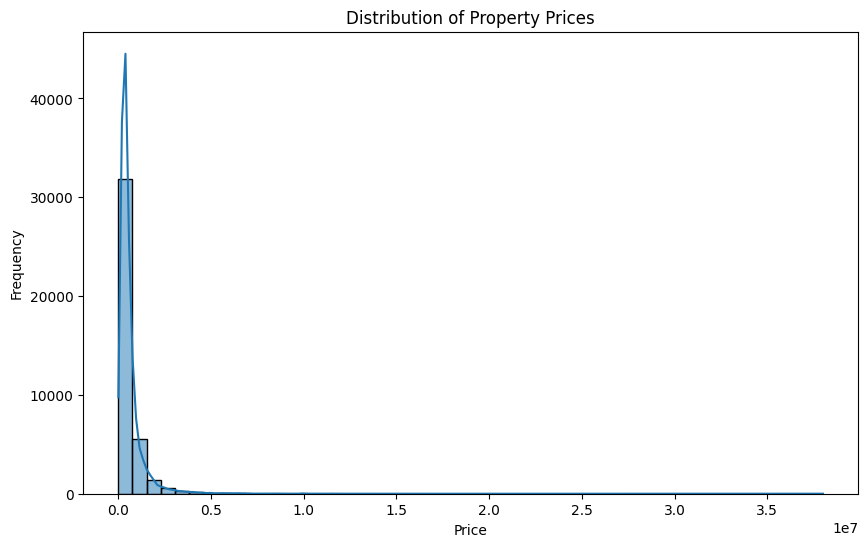

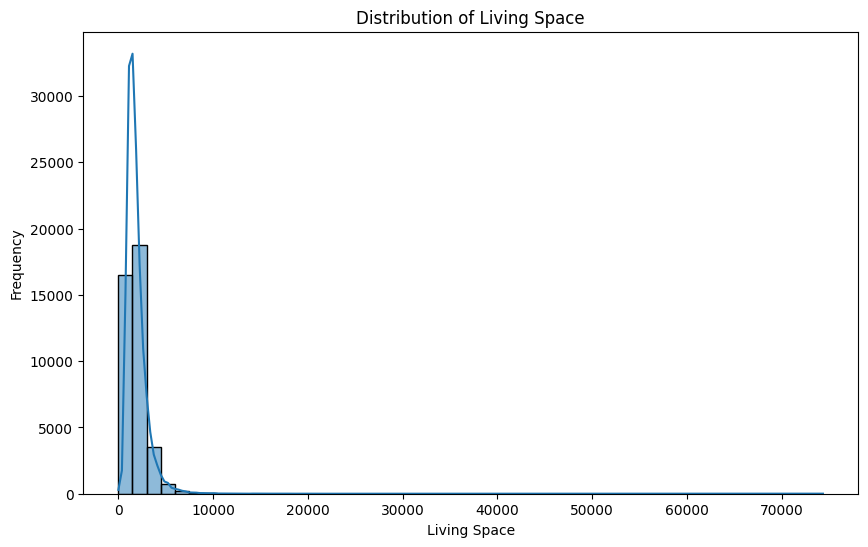

In [47]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Price'], bins=50, kde=True)
plt.title('Distribution of Property Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(df['Living Space'], bins=50, kde=True)
plt.title('Distribution of Living Space')
plt.xlabel('Living Space')
plt.ylabel('Frequency')
plt.show()

**Interpretation:** The histograms show the distribution of property prices and living space. The price distribution is heavily right-skewed, indicating many properties at lower prices and fewer at higher prices. The living space distribution is also skewed, with more smaller properties and fewer larger ones.

### Can I compare two related quantities? Can I make a scatterplot? Can I see any correlations?

Yes, we can compare related quantities like Living Space and Price, or Median Household Income and Price, using scatter plots to identify correlations.

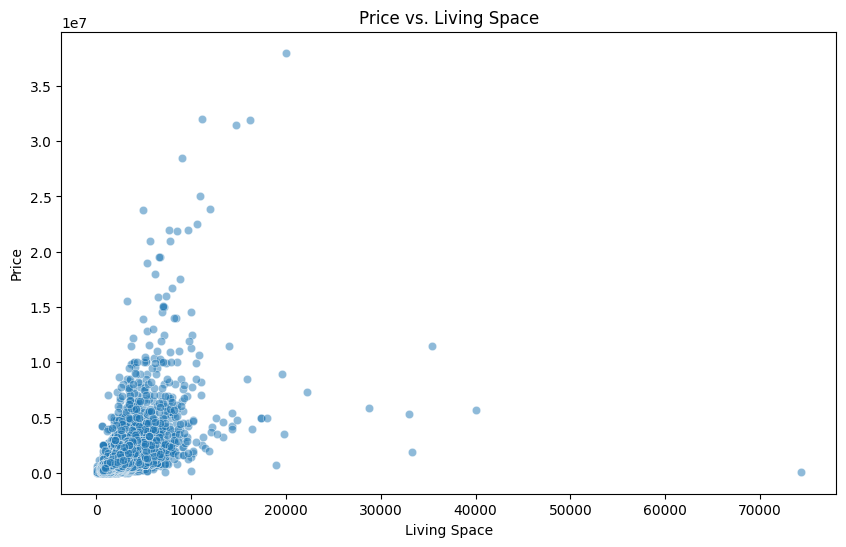

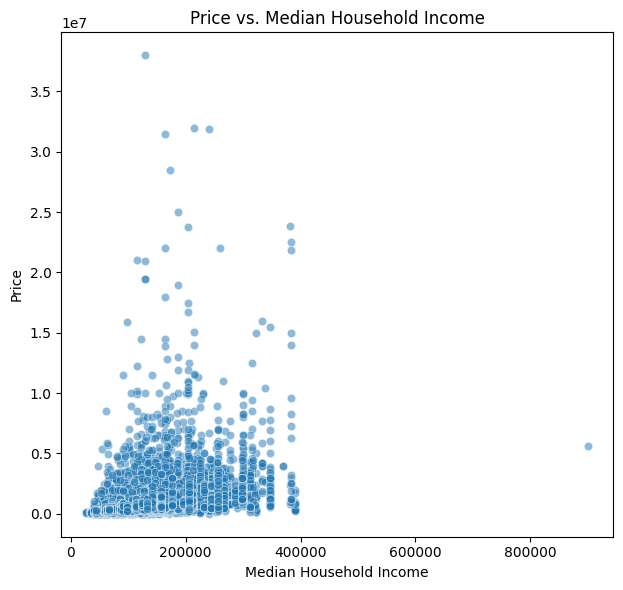

In [48]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Living Space', y='Price', alpha=0.5)
plt.title('Price vs. Living Space')
plt.xlabel('Living Space')
plt.ylabel('Price')
plt.show()

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 2)
sns.scatterplot(data=df, x='Median Household Income', y='Price', alpha=0.5)
plt.title('Price vs. Median Household Income')
plt.xlabel('Median Household Income')
plt.ylabel('Price')
plt.tight_layout()
plt.show()

**Interpretation:** The scatter plot of Price vs. Living Space shows a positive correlation: larger living spaces generally correspond to higher prices. The scatter plot of Price vs. Median Household Income also shows a positive correlation, suggesting properties in areas with higher median incomes are typically more expensive.

### Looking at the plots, what are some insights I can make? Is there a hypothesis I can - and should - investigate further? What other questions are the insights leading me to ask?

Based on the visualizations, we can formulate insights, hypotheses, and further questions.

## Insights, Hypotheses, and Further Questions

**Insights and Observations:**

*   Living space and median household income appear to be among the strongest positive indicators of property price in this dataset.
*   The number of beds and baths also significantly influences price (as seen in the box plots from the previous analysis).
*   Geographical location plays a crucial role in property valuation, with certain areas exhibiting consistently higher prices (as seen in the geographical scatter plot from the previous analysis).
*   The right-skewed nature of the price distribution suggests that median or other robust measures might be more representative than the mean when describing typical property prices in this dataset.

**Hypotheses:**

1.  **Hypothesis 1 (Income and Price):** Zip codes with a higher median household income have a significantly higher average property price compared to zip codes with a lower median household income.
2.  **Hypothesis 2 (Living Space and Price):** There is a strong positive linear correlation between the living space of a property and its price, independent of its geographical location.

**Further Questions:**

1.  What is the average price per square foot in different states or major metropolitan areas within the dataset?
2.  Are there specific characteristics (e.g., number of beds/baths, living space, income) that define high-value properties compared to average-value properties?
3.  How does the age of the property, if available, correlate with its price, and does this relationship vary by location?

## Conclusion

This notebook summarized the key findings from the exploratory data analysis of the American housing market dataset, addressing the initial questions, highlighting trends and correlations through visualizations, and formulating hypotheses and further questions for continued investigation. The analysis revealed the significant influence of factors like living space, median household income, and location on property prices, providing a foundation for deeper dives into the dynamics of the US housing market.